In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from collections import Counter
from datetime import datetime
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# these three line import for Choropleth Maps
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()

#set up everything so that the figures show up in the notebook
init_notebook_mode(connected=True) 


df1 = pd.DataFrame.from_csv('Carsharing/OPENDATA_BOOKING_CARSHARING.csv', index_col=None, sep=";")
df3 = pd.DataFrame.from_csv('Carsharing/OPENDATA_VEHICLE_CARSHARING.csv', index_col=None, sep=";")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:

df1.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN


In [3]:
df3.head()

,VEHICLE_HAL_ID,VEHICLE_MODEL_TYPE,VEHICLE_MANUFACTURER_NAME,VEHICLE_MODEL_NAME,VEHICLE_TYPE_NAME,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,OWNERSHIP_TYPE,CAPACITY_AMOUNT,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
0,143031,Auto,Ford,Transit,"2,2 Diesel 63kW !! kein Radio !!",WF0XXXBDFX8R74238,F-R 8018,NaN,63,Diesel,Langzeitmiete,60 l,NaN,Flinkster (Endkd.),DB Fuhrpark
1,146501,Auto,MCC,E-Smart,E-Smart 30 kW,WME4513911K386156,B-SB 4460,NaN,30,Strom,Langzeitmiete,NaN,NaN,Flinkster (Endkd.),DB Fuhrpark
2,147314,Auto,Ford,Focus,"1,6 Diesel 80kW NAVI",WF0SXXGCDSAA82712,F-R 8794,NaN,80,Diesel,Langzeitmiete,52 l,NaN,Flinkster (Endkd.),DB Fuhrpark
3,147382,Auto,Opel,Astra,"1,7 Diesel 81kW NAVI",W0L0AHL35B2057645,F-R 8829,NaN,81,Diesel,Langzeitmiete,52 l,NaN,Flinkster (Endkd.),DB Fuhrpark
4,147392,Auto,MCC,E-Smart,E-Smart 30 kW,WME4513911K448772,HH-EM 3019,NaN,30,Strom,Langzeitmiete,NaN,NaN,Flinkster (Endkd.),DB Fuhrpark


In [4]:
mergedvehicle =pd.merge(df1,df3, on ='VEHICLE_HAL_ID', how ='inner')
mergedvehicle.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,OWNERSHIP_TYPE,CAPACITY_AMOUNT,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark


In [5]:
mergedvehicle.drop(['CATEGORY_HAL_ID','COMPUTE_EXTRA_BOOKING_FEE','TRAVERSE_USE',
                    'REGISTRATION_PLATE','SERIAL_NUMBER','OWNERSHIP_TYPE','ACCESS_CONTROL_COMPONENT_TYPE',
                    'COMPANY','COMPANY_GROUP','END_RENTAL_ZONE','END_RENTAL_ZONE_HAL_ID',
                    'TECHNICAL_INCOME_CHANNEL','VEHICLE_MODEL_TYPE','VEHICLE_MANUFACTURER_NAME',
                   'VEHICLE_TYPE_NAME','CAPACITY_AMOUNT','VEHICLE_MODEL_NAME','DATE_BOOKING',
                   'VIN','FUEL_TYPE_NAME','KW','RENTAL_ZONE_HAL_SRC','DISTANCE','BOOKING_HAL_ID',
                   'START_RENTAL_ZONE_HAL_ID','START_RENTAL_ZONE'], axis = 1, inplace = True, errors = 'ignore')
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln


In [6]:
mergedvehicle['VEHICLE_HAL_ID'].value_counts().head()

156602    1483
157331    1423
157330    1361
156777    1337
160280    1331
Name: VEHICLE_HAL_ID, dtype: int64

In [7]:
mergedvehicle['DATE_FROM']=pd.to_datetime(mergedvehicle['DATE_FROM'])

In [8]:
mergedvehicle['from_year']=mergedvehicle.DATE_FROM.dt.year
mergedvehicle['from_month']=mergedvehicle.DATE_FROM.dt.month
mergedvehicle['from_weekday']=mergedvehicle.DATE_FROM.dt.weekday_name
# You can also do by using lambda function
mergedvehicle['from_hour'] = mergedvehicle['DATE_FROM'].apply(lambda time: time.hour)
mergedvehicle['from_date']=mergedvehicle['DATE_FROM'].apply(lambda time: time.date())
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln,2014,1,Sunday,13,2014-01-12
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln,2014,1,Sunday,14,2014-01-05
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln,2014,3,Sunday,18,2014-03-16
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln,2014,1,Monday,17,2014-01-06
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln,2014,1,Monday,17,2014-01-13


In [9]:
mergedvehicle['vehicleDate'] = mergedvehicle[['VEHICLE_HAL_ID','from_date']].apply(lambda x : '{} / {}'.format(x[0],x[1]), axis=1)
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln,2014,1,Sunday,13,2014-01-12,150359 / 2014-01-12
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln,2014,1,Sunday,14,2014-01-05,150359 / 2014-01-05
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln,2014,3,Sunday,18,2014-03-16,150359 / 2014-03-16
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln,2014,1,Monday,17,2014-01-06,150359 / 2014-01-06
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln,2014,1,Monday,17,2014-01-13,150359 / 2014-01-13


In [10]:
mergedvehicle.index = pd.PeriodIndex(mergedvehicle.from_date, freq='D')

In [11]:
mergedvehicle = mergedvehicle.sort_values(by ='from_date')
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-01,149195,8D61A183DE42905F733B36AEF17A933986FA4FFC,2014-01-01 11:00:00,2014-01-01 13:45:00,Köln,2014,1,Wednesday,11,2014-01-01,149195 / 2014-01-01
2014-01-01,148693,5F50A888063B0FEF9C549C86B252D7140C5BD701,2014-01-01 14:30:00,2014-01-01 21:00:00,Köln,2014,1,Wednesday,14,2014-01-01,148693 / 2014-01-01
2014-01-01,148675,AD46053C12E3BFA57534DECB7A400AECAAF9F332,2014-01-01 18:15:00,2014-01-02 01:30:00,Berlin,2014,1,Wednesday,18,2014-01-01,148675 / 2014-01-01
2014-01-01,148675,EA3F9BA222BED9137A3F4A0A684FD27BD9048AAC,2014-01-01 15:00:00,2014-01-01 17:00:00,Berlin,2014,1,Wednesday,15,2014-01-01,148675 / 2014-01-01
2014-01-01,148693,2DD91607E6D9BE3AD843E4EFA55A6AF17029A9AB,2014-01-01 12:15:00,2014-01-01 14:15:00,Köln,2014,1,Wednesday,12,2014-01-01,148693 / 2014-01-01


In [12]:
mergedvehiclecitymunchen = mergedvehicle.loc[mergedvehicle.CITY_RENTAL_ZONE == "München"]
#mergedvehiclecitymunchen= mergedvehicle
mergedvehiclecitymunchen.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-01,154672,0EF6727387D501F39ACEFCE2A5E9367E7B2C0A49,2014-01-01 10:00:00,2014-01-01 19:00:00,München,2014,1,Wednesday,10,2014-01-01,154672 / 2014-01-01
2014-01-01,150225,06F64E4A7C54FC617589678DABD19EA816F606B6,2014-01-01 09:00:00,2014-01-01 22:00:00,München,2014,1,Wednesday,9,2014-01-01,150225 / 2014-01-01
2014-01-01,154725,4551F71957A7A5E0B47C1C9976F6599666BF906B,2014-01-01 17:00:00,2014-01-01 22:45:00,München,2014,1,Wednesday,17,2014-01-01,154725 / 2014-01-01
2014-01-01,154648,1AAB03B481936BDEF0FCCE07520E949721414225,2014-01-01 11:00:00,2014-01-01 17:15:00,München,2014,1,Wednesday,11,2014-01-01,154648 / 2014-01-01
2014-01-01,150789,3A4B62BB64A4C757A49D749C9A980FCD44D73FE0,2014-01-01 16:00:00,2014-01-01 23:30:00,München,2014,1,Wednesday,16,2014-01-01,150789 / 2014-01-01


In [13]:
#mergedvehiclecitymunchen= mergedvehiclecitymunchen#[mergedvehiclecitymunchen.from_year == 2016]

#mergedvehiclecitymunchen.head()

In [14]:
mergedvehiclecitymunchenmonth= mergedvehiclecitymunchen#[mergedvehiclecitymunchen2016.from_year == 2016]

mergedvehiclecitymunchenmonth.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2017-05-16,170513,4E9A90F3EB4A5A4285E42FF02F4B0344F5ED72D7,2017-05-16 07:00:00,2017-05-16 23:00:00,München,2017,5,Tuesday,7,2017-05-16,170513 / 2017-05-16
2017-05-16,173517,1A5C8B89D697D134FC114EF68D35D1B1D5A724BB,2017-05-16 08:30:00,2017-05-16 12:30:00,München,2017,5,Tuesday,8,2017-05-16,173517 / 2017-05-16
2017-05-16,173542,5438D8AA146DF7710B61692BABD39BDEDB539D94,2017-05-16 08:30:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,173542 / 2017-05-16
2017-05-16,174215,2DC80C83FB638F31A6905AF0B68EF1CEDB73B18C,2017-05-16 08:00:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,174215 / 2017-05-16
2017-05-16,167786,06EBEE3B0F8AA11CCE044D931603C7B5D1B3881B,2017-05-16 05:00:00,2017-05-16 05:15:00,München,2017,5,Tuesday,5,2017-05-16,167786 / 2017-05-16


In [15]:


january = mergedvehiclecitymunchenmonth[(mergedvehiclecitymunchenmonth.index >= '2014-01-01')
                                            & (mergedvehiclecitymunchenmonth.index < '2017-05-30')]
january.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2017-05-16,170513,4E9A90F3EB4A5A4285E42FF02F4B0344F5ED72D7,2017-05-16 07:00:00,2017-05-16 23:00:00,München,2017,5,Tuesday,7,2017-05-16,170513 / 2017-05-16
2017-05-16,173517,1A5C8B89D697D134FC114EF68D35D1B1D5A724BB,2017-05-16 08:30:00,2017-05-16 12:30:00,München,2017,5,Tuesday,8,2017-05-16,173517 / 2017-05-16
2017-05-16,173542,5438D8AA146DF7710B61692BABD39BDEDB539D94,2017-05-16 08:30:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,173542 / 2017-05-16
2017-05-16,174215,2DC80C83FB638F31A6905AF0B68EF1CEDB73B18C,2017-05-16 08:00:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,174215 / 2017-05-16
2017-05-16,167786,06EBEE3B0F8AA11CCE044D931603C7B5D1B3881B,2017-05-16 05:00:00,2017-05-16 05:15:00,München,2017,5,Tuesday,5,2017-05-16,167786 / 2017-05-16


In [16]:
a=january.sort_values('vehicleDate', ascending=False).drop_duplicates(['vehicleDate']) 
a.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-09,148191,DBC3EF4F1FD6B33CB67FDFF4820D2A01A7AC743A,2014-01-09 12:30:00,2014-01-09 13:15:00,München,2014,1,Thursday,12,2014-01-09,148191 / 2014-01-09
2014-01-08,148191,40CB090920B477F668E745ED62359AF72B99CB09,2014-01-08 18:00:00,2014-01-08 19:45:00,München,2014,1,Wednesday,18,2014-01-08,148191 / 2014-01-08
2014-01-06,148191,40CB090920B477F668E745ED62359AF72B99CB09,2014-01-06 13:30:00,2014-01-06 16:45:00,München,2014,1,Monday,13,2014-01-06,148191 / 2014-01-06
2014-01-03,148191,4BA53976EAF81E462CB28E108B6236D5FB70B410,2014-01-03 08:00:00,2014-01-05 18:30:00,München,2014,1,Friday,8,2014-01-03,148191 / 2014-01-03
2014-01-02,148191,A47B5E7AD330DB960593A34C4EEE0D43EE2DEDAF,2014-01-02 08:00:00,2014-01-02 13:00:00,München,2014,1,Thursday,8,2014-01-02,148191 / 2014-01-02


In [17]:
#a['vehicleDate'] = a[['VEHICLE_HAL_ID','from_date']].apply(lambda x : '{}/{}'.format(x[0],x[1]), axis=1)
#a.head()

In [18]:
aunique= a.groupby('from_date').count()
aunique.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,vehicleDate
from_date,,,,,,,,,,
2014-01-01,34,34,34,34,34,34,34,34,34,34
2014-01-02,50,50,50,50,50,50,50,50,50,50
2014-01-03,70,70,70,70,70,70,70,70,70,70
2014-01-04,81,81,81,81,81,81,81,81,81,81
2014-01-05,54,54,54,54,54,54,54,54,54,54


In [19]:
plt.figure(figsize=(20,8))
aunique.VEHICLE_HAL_ID.iplot( title='Count of Vehicles in Munchen city ')

In [20]:
bycountmunchenmonth1= mergedvehiclecitymunchenmonth.groupby('from_date').count()
bycountmunchenmonth1.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,vehicleDate
from_date,,,,,,,,,,
2014-01-01,39,39,39,39,39,39,39,39,39,39
2014-01-02,71,71,71,71,71,71,71,71,71,71
2014-01-03,88,88,88,88,88,88,88,88,88,88
2014-01-04,122,122,122,122,122,122,122,122,122,122
2014-01-05,64,64,64,64,64,64,64,64,64,64


In [21]:
plt.figure(figsize=(20,8))
bycountmunchenmonth1.VEHICLE_HAL_ID.iplot( title='Count of Customers in Munchen city')


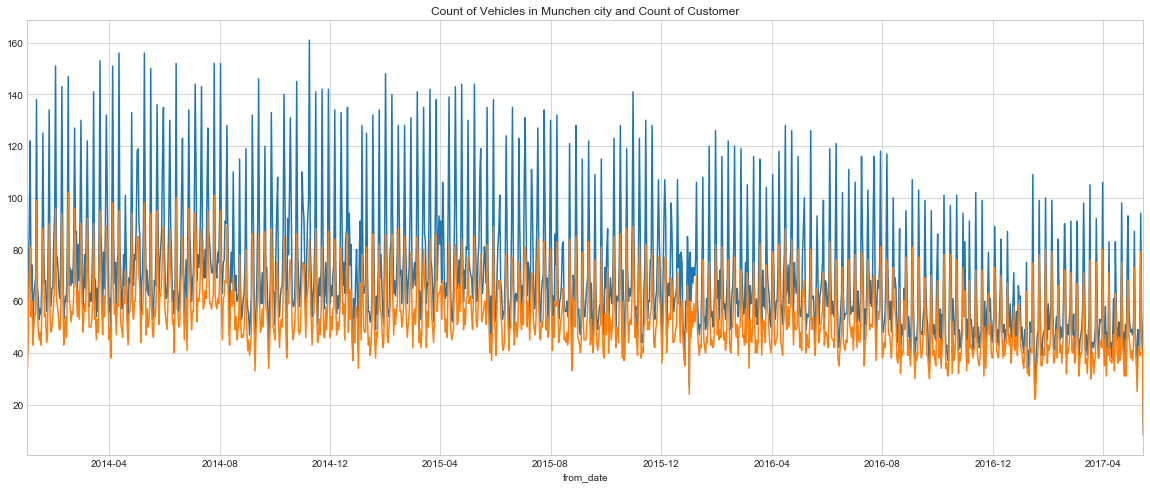

In [22]:
plt.figure(figsize=(20,8))
bycountmunchenmonth1.VEHICLE_HAL_ID.plot( title='Count of Vehicles  booking times in Munchen city')
aunique.VEHICLE_HAL_ID.plot( title='Count of Vehicles in Munchen city and Count of Customer')


# Prophet Model Forcasting

In [23]:
import pandas as pd
import numpy as np
from fbprophet import Prophet



In [24]:
#aunique.head()

In [25]:
aunique.drop(['CUSTOMER_HAL_ID','DATE_FROM','TRAVERSE_USE',
                    'DATE_UNTIL','CITY_RENTAL_ZONE','from_year','from_month',
                    'from_weekday','from_hour','vehicleDate'], axis = 1, inplace = True, errors = 'ignore')
aunique.head()

,VEHICLE_HAL_ID
from_date,
2014-01-01,34
2014-01-02,50
2014-01-03,70
2014-01-04,81
2014-01-05,54


In [26]:
aunique['ds'] = aunique.index
aunique.head()

,VEHICLE_HAL_ID,ds
from_date,,
2014-01-01,34,2014-01-01
2014-01-02,50,2014-01-02
2014-01-03,70,2014-01-03
2014-01-04,81,2014-01-04
2014-01-05,54,2014-01-05


In [27]:
#aunique['y'] = np.log(aunique['VEHICLE_HAL_ID']) # this is normalized 
aunique['y'] =aunique.VEHICLE_HAL_ID

yy=aunique[['ds','VEHICLE_HAL_ID']].tail(16)

yy


,ds,VEHICLE_HAL_ID
from_date,,
2017-05-01,2017-05-01,43
2017-05-02,2017-05-02,38
2017-05-03,2017-05-03,41
2017-05-04,2017-05-04,37
2017-05-05,2017-05-05,43
2017-05-06,2017-05-06,73
2017-05-07,2017-05-07,46
2017-05-08,2017-05-08,37
2017-05-09,2017-05-09,25


In [28]:
# Python
m = Prophet()
m.fit(aunique);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1592,2018-05-12
1593,2018-05-13
1594,2018-05-14
1595,2018-05-15
1596,2018-05-16


In [30]:
forecast = m.predict(future)
forecast[['ds' ,'yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1592,2018-05-12,61.721381,53.096536,70.327300
1593,2018-05-13,39.876095,31.165021,49.198517
1594,2018-05-14,28.958751,20.193915,36.762849
1595,2018-05-15,28.561325,19.518696,37.241585
1596,2018-05-16,29.102644,20.596593,37.533930


In [31]:
a = forecast[(forecast.ds >= '2017-05-01') & (forecast.ds < '2017-05-17')]

a[['ds', 'yhat','yhat_lower', 'yhat_upper']].head(30)


,ds,yhat,yhat_lower,yhat_upper
1216,2017-05-01,38.511652,30.436555,46.983432
1217,2017-05-02,38.140159,28.633897,46.663675
1218,2017-05-03,38.683860,29.673324,47.995666
1219,2017-05-04,40.104257,31.569517,49.031048
1220,2017-05-05,47.463053,38.578079,56.737586
1221,2017-05-06,70.501093,61.951907,78.678404
1222,2017-05-07,48.646813,40.366556,57.126274
1223,2017-05-08,37.709387,29.246670,46.045666
1224,2017-05-09,37.282043,28.974980,46.330236
1225,2017-05-10,37.785108,28.646163,46.278490


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse = sqrt(mean_squared_error(yy['VEHICLE_HAL_ID'], a['yhat']))

In [33]:
rmse

8.633613245771084

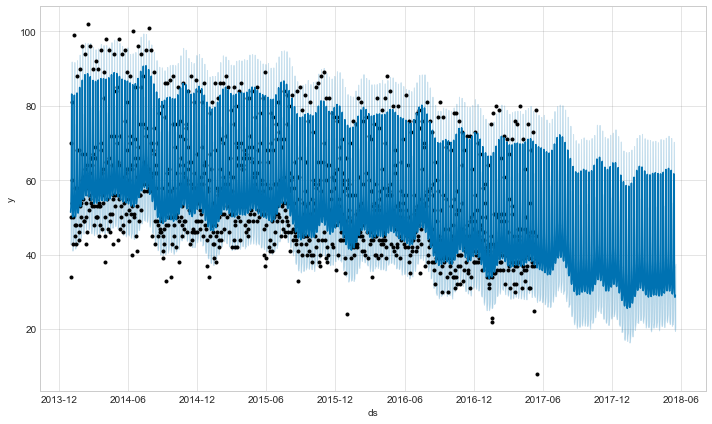

In [34]:
m.plot(forecast);

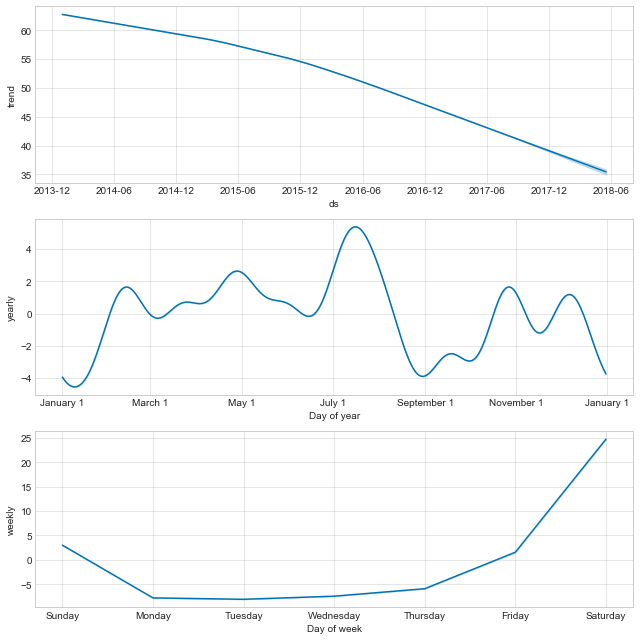

In [35]:
m.plot_components(forecast);